<a href="https://colab.research.google.com/github/ed-roberts-github/Previous-work/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Importing the libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [17]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values 
#note not importing the age collumn just beacuse it'll make it easy to visualise at the end
#In a real model you could do it with 3 independant variables 
#also not don't have a dependant variable so no y value 

## Using the elbow method to find the optimal number of clusters

Elbow method is a way to work out how many clusters to use.

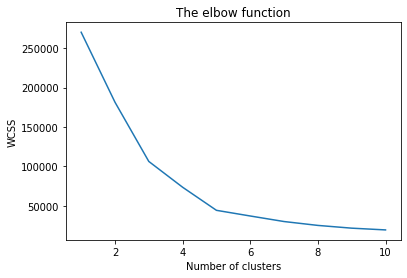

In [18]:
from sklearn.cluster import KMeans
wcss = [] 

#filling the wcss list with all wcss values from 1 to 10
for i in range(1, 11): #looping through 1 to 10
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) #avoiding random initialization trap with kmeans++
  kmeans.fit(X)
  wcss.append(kmeans.inertia_) #the inertia attribute works out the wcss value

plt.plot(range(1,11),wcss)
plt.title("The elbow function")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Can see from elbow graph that optimum numuber of clusters is 5.

## Training the K-Means model on the dataset

In [19]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42) #now making object§§§§§§§ with the optimum (5) clusters
y_kmeans = kmeans.fit_predict(X) #creating dependant variable from training

In [20]:
print(y_kmeans)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


## Visualising the clusters

<function matplotlib.pyplot.show>

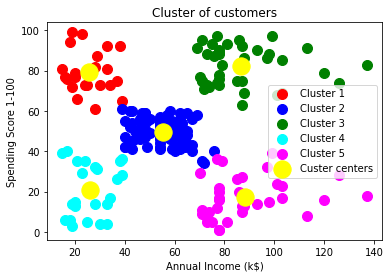

In [24]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster 1') #size = 100
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Custer centers')#plotting cluster centers
plt.title('Cluster of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score 1-100')
plt.legend()
plt.show